<a href="https://colab.research.google.com/github/CarmelLaetitiaMobio/CarmelLaetitiaMobio/blob/main/Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

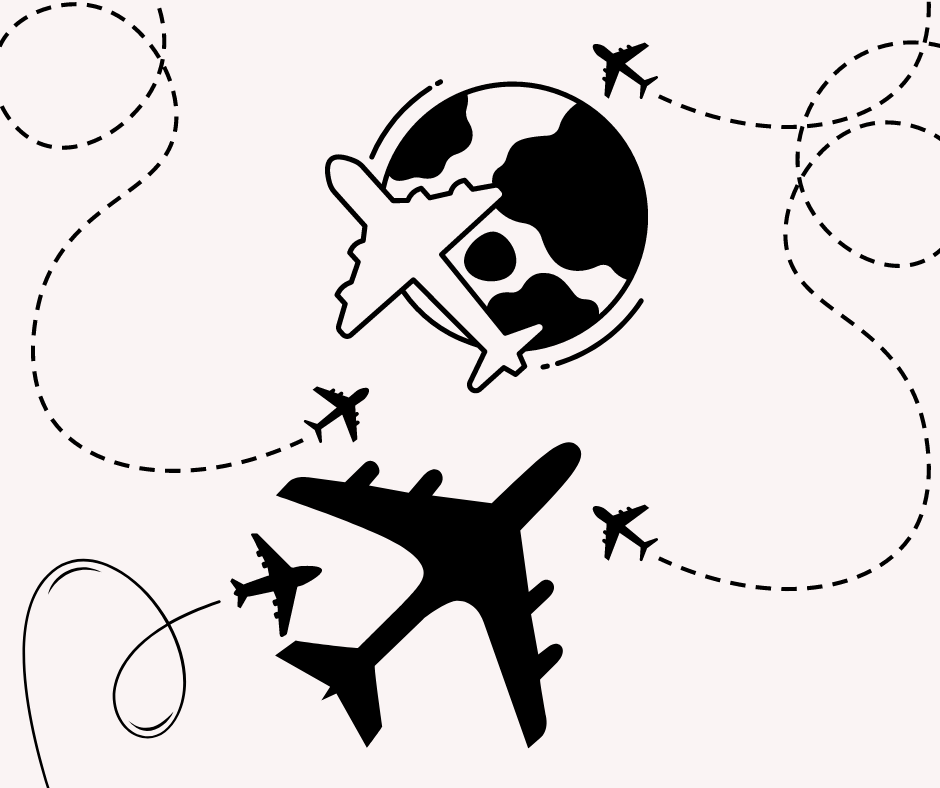

In [50]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.metrics import accuracy_score
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

# **Summary**

This is the first project from the ForDataGeek group Python Immersion.
In this project, we will analyse 539383  airplanes data and go through EDA process.


In [40]:
#upload the Airlines data from the excel file
from google.colab import files
uploaded = files.upload()



Saving Airlines.csv to Airlines (2).csv


# **Objective**

The task is to predict whether a given flight will be delayed, given the information of the scheduled departure.


**Database Schema**

There are eight different features in the database:

* Id- This is the list of unique identifier

* Airline - This contains a list of all airlines

* Flight - This contains a list of all flight numbers

* AirportFrom - This contains a list of all airports where the plane is departed from

* AirportTo - This contains a list of all airports where the plane is going to

* DayOfWeek - This contains a list of the days of the week

* Time- This contains a list of time

* Length - This contains a list of flight length

* Delay - This contains a list of delays in binary










***Reading the Dataset***

In [41]:
import io

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# **Data Cleaning**

In [42]:
#checking numbers of columns and rows

df.shape


(539383, 9)

In [43]:
#check for unique IDs

df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [44]:
#check for unique IDs

df['id'].nunique()  # checking for duplicate

539383

***Datatypes***

In [9]:
df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [8]:
df.describe().style.background_gradient(cmap = "Blues")


,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


***Missing Values***

In [11]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

***Converting Data***

In [14]:
#Change the dayofweek as string


import calendar
day_mapping={1:'Monday', 2:'Tuesday', 3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping)

#Convert delays value with boolean value

#delay_mapping={1:'True', 0:'False'}
#df['Delay']=df['Delay'].map(delay_mapping)

In [15]:
df.head().style.background_gradient(cmap = "Blues") #verifying the date conversation

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,Wednesday,15,205,1
1,2,US,1558,PHX,CLT,Wednesday,15,222,1
2,3,AA,2400,LAX,DFW,Wednesday,20,165,1
3,4,AA,2466,SFO,DFW,Wednesday,20,195,1
4,5,AS,108,ANC,SEA,Wednesday,30,202,0


# ***Exploratory Data Analysis***

***Airlines and Flights Analyses***

Which airline has the most flights?




In [14]:

airline_counts = df['Airline'].value_counts()
most_flights_airline = airline_counts.index[0]
print(f"Airline with the most flights: {most_flights_airline}")



Airline with the most flights: WN


Which airports have the most outgoing flights?



In [24]:
# Count the number of outgoing flights for each airport
outgoing_flights = df['AirportFrom'].value_counts()
print(outgoing_flights)

AirportFrom
ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: count, Length: 293, dtype: int64




Is there any correlation between the airline and flight delays?



delay_by_airline: Airline
9E    0.397660
AA    0.388470
AS    0.339290
B6    0.467038
CO    0.566199
DL    0.450476
EV    0.402208
F9    0.449040
FL    0.301292
HA    0.320186
MQ    0.348095
OH    0.277276
OO    0.452899
UA    0.323907
US    0.335971
WN    0.697759
XE    0.378944
YV    0.242914
Name: Delay, dtype: float64
Correlation between airline and flight delays: 0.07558267474829693


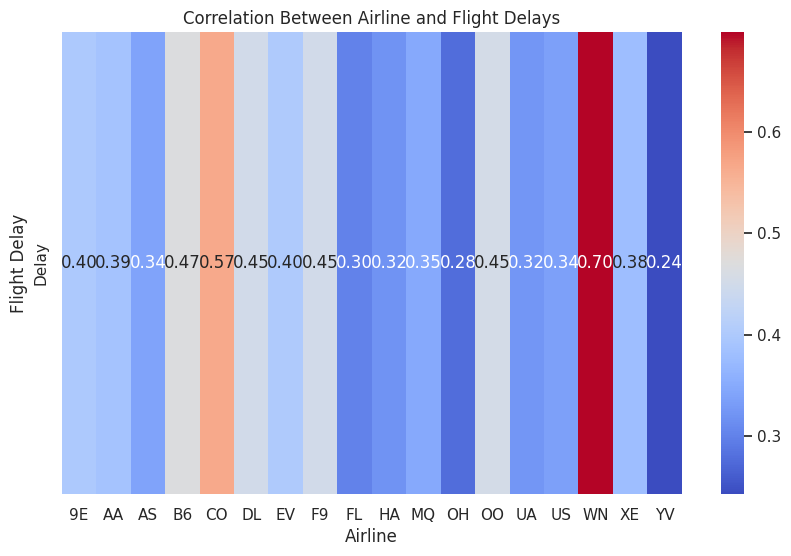

In [16]:


# Calculate mean delay for each airline
delay_by_airline = df.groupby('Airline')['Delay'].mean()

print("delay_by_airline:",delay_by_airline)

# Calculate correlation coefficient
correlation_coefficient = df['Airline'].corr(df['Delay'], method='spearman')

# Print the correlation coefficient
print("Correlation between airline and flight delays:", correlation_coefficient)

# Create a DataFrame with airline names as columns and flight delays as rows
correlation_matrix = pd.DataFrame(delay_by_airline).T


# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Airline and Flight Delays')
plt.xlabel('Airline')
plt.ylabel('Flight Delay')
plt.show()


  The correlation is closed to 0 so we can concluse that there is a very weak positive correlation between airline and flight delays, but it's not strong enough to draw any significant conclusions about the relationship between these two variables.

What is the distribution of flight numbers?

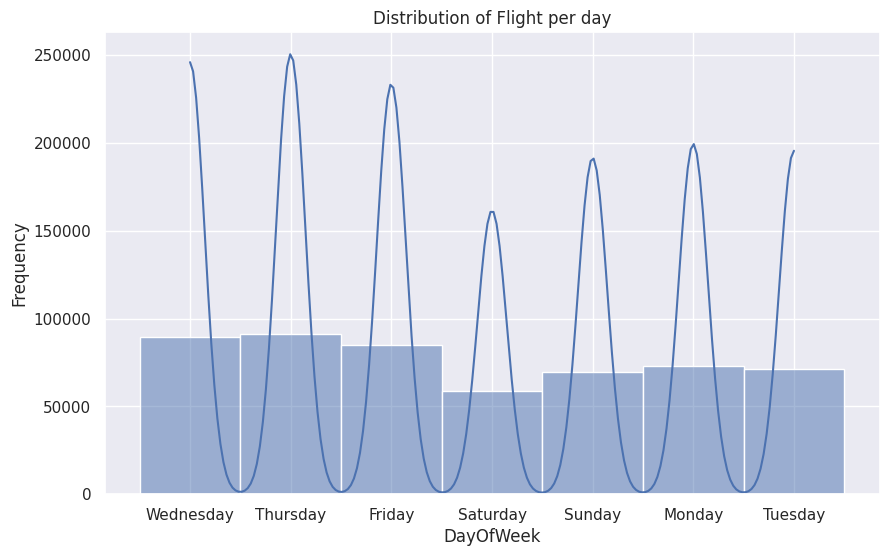

In [17]:
# Plotting the distribution of flight per day using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['DayOfWeek'], bins=50, kde=True)
plt.title('Distribution of Flight per day')
plt.xlabel('DayOfWeek')
plt.ylabel('Frequency')
plt.show()

Based on our plot, the distribution is relatively uniform, which suggests that the flights are evenly distributed across the weeks even though Wednesday and Thursady seems to have a higher number of flights


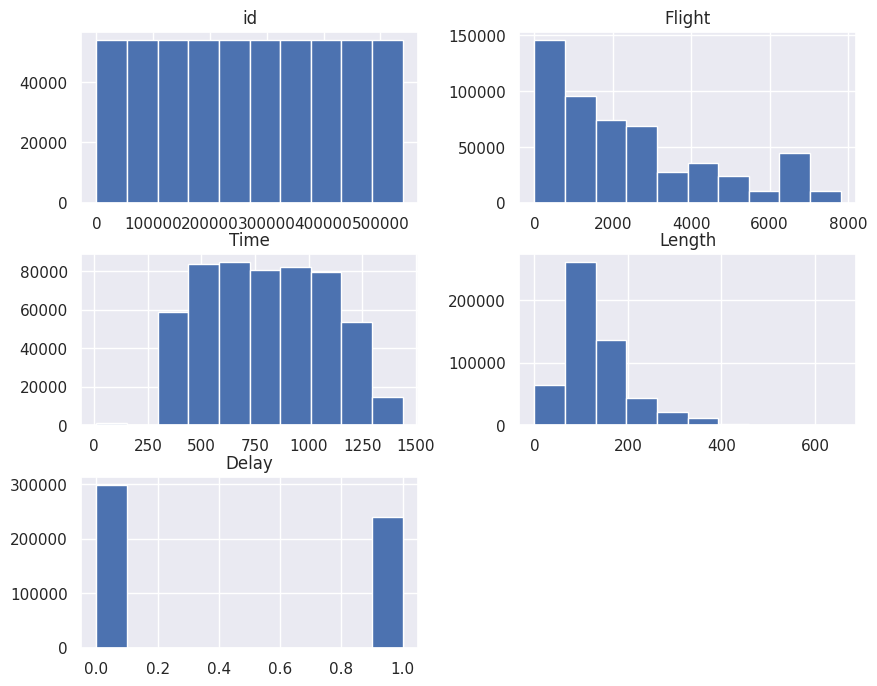

In [18]:
# Histograms
df.hist(figsize=(10, 8))
plt.show()

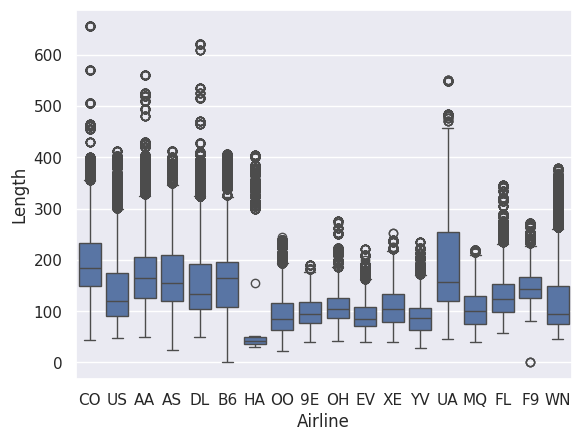

In [19]:
# Box plot
sns.boxplot(x='Airline', y='Length', data=df)
plt.show()

*Interpretation*

The boxplot visualizes the distribution of flight lengths (in minutes) for each airline.


- Airline CO and DL have a wider range of flight lengths compared to other airlines, as indicated by the longer whiskers.
- Airline HA and 9A have relatively shorter flight lengths, with HA having a tighter distribution compared to 9A.



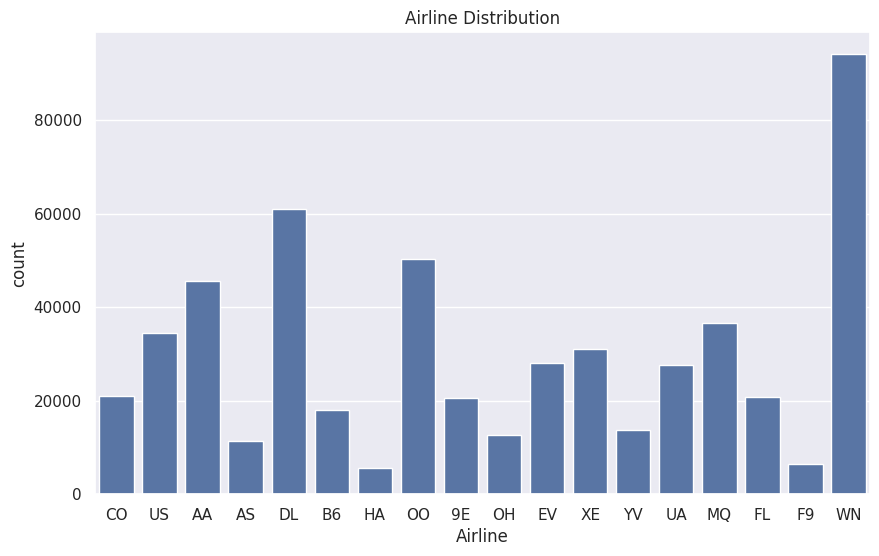

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Airline', data=df)
plt.title('Airline Distribution')
plt.show()


*Average Delay*

In [21]:
# Calculate average delay for each airline
average_delay = df.groupby('Airline')['Delay'].mean()
print(average_delay)


Airline
9E    0.397660
AA    0.388470
AS    0.339290
B6    0.467038
CO    0.566199
DL    0.450476
EV    0.402208
F9    0.449040
FL    0.301292
HA    0.320186
MQ    0.348095
OH    0.277276
OO    0.452899
UA    0.323907
US    0.335971
WN    0.697759
XE    0.378944
YV    0.242914
Name: Delay, dtype: float64


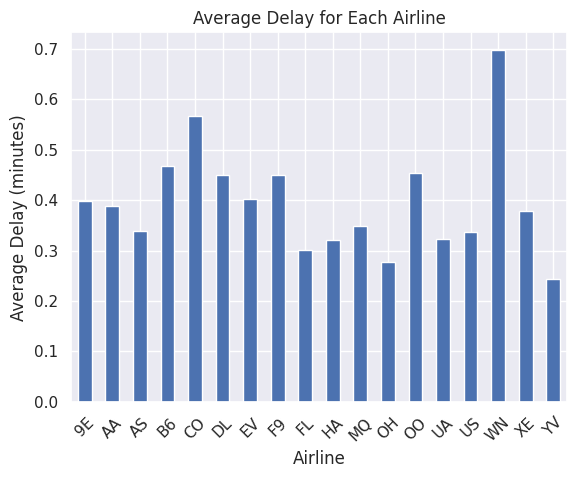

In [22]:
# Plot average delay for each airline
average_delay.plot(kind='bar')
plt.title('Average Delay for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

What is the distribution of flight delays on different days of the week?

DayOfWeek
Friday       0.416608
Monday       0.467644
Saturday     0.400553
Sunday       0.453541
Thursday     0.451025
Tuesday      0.447337
Wednesday    0.470818
Name: Delay, dtype: float64


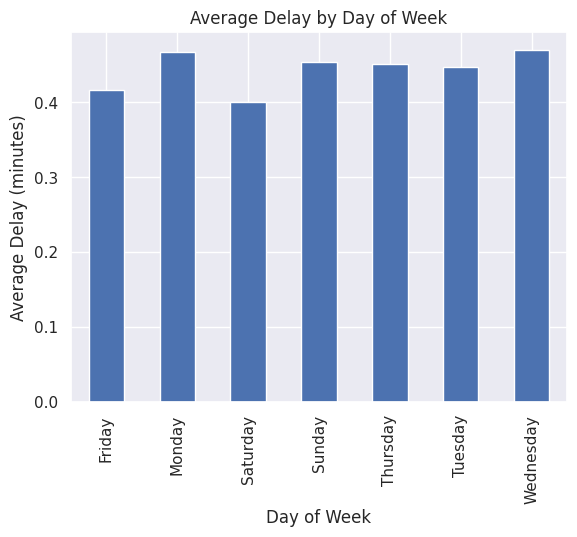

In [23]:
# Group data by DayOfWeek and calculate average delay
avg_delay_by_day = df.groupby('DayOfWeek')['Delay'].mean()
print(avg_delay_by_day)

# Plot the average delay for each day
avg_delay_by_day.plot(kind='bar')
plt.title('Average Delay by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Delay (minutes)')
plt.show()

There are more delays observed on Monday and Friday.

**Predictive Analysis**

Accuracy: 0.5696580364674583
Coefficients: {'Airline': 0.011479469843009685, 'Flight': -8.431863339626777e-05, 'AirportFrom': -0.0006759605836235967, 'AirportTo': 6.6407289710445674e-06, 'DayOfWeek': -0.08338238040385733, 'Time': 0.0005668884403712359, 'Length': -0.0006824066112432115}


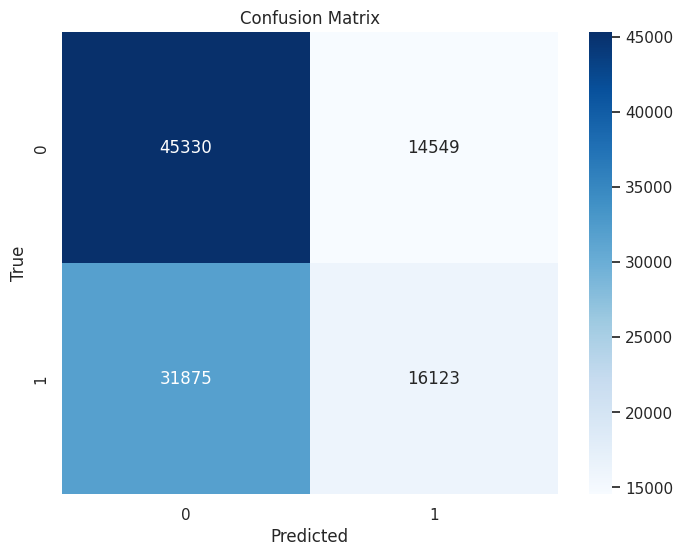

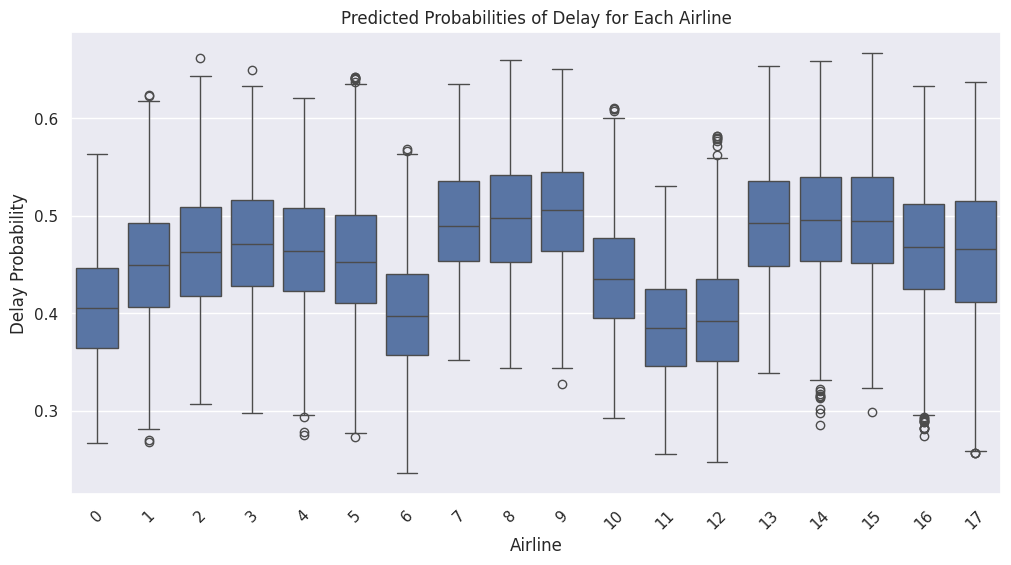

In [51]:
# Convert categorical variables to numerical labels
label_encoder = LabelEncoder()
df['Airline']= label_encoder.fit_transform(df['Airline'])
df['AirportFrom'] = label_encoder.fit_transform(df['AirportFrom'])
df['AirportTo'] = label_encoder.fit_transform(df['AirportTo'])

# Define features and target variable
X = df[['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']]
y = df['Delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict delays on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get coefficients for each feature
coefficients = dict(zip(X.columns, model.coef_[0]))
print("Coefficients:", coefficients)

# Predict probabilities of delay for each airline
probs = model.predict_proba(X_test)[:, 1]
airlines = label_encoder.inverse_transform(X_test['Airline'])

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Create a DataFrame for visualization
results = pd.DataFrame({'Airline': airlines, 'Delay Probability': probs})

# Plot the predicted probabilities of delay for each airline
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Delay Probability', data=results)
plt.title('Predicted Probabilities of Delay for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Delay Probability')
plt.xticks(rotation=45)
plt.show()

From the confusion matrix, the classification model could only predict 16123 delayed flights correctly.

The accuracy of the model is 0.5697, or approximately 57%
The flight number has a minimal impact on predicting flight delays.
The departure and arrival location do not play a role in the delay.

The positive coefficient for 'Airline' indicates that certain airlines are associated with a higher probability of delays.

The negative coefficient for 'DayOfWeek' suggests that certain days of the week are associated with fewer delays.
